In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os
import sys
from scipy.spatial.distance import pdist, squareform


In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP +'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

In [3]:
derek = pd.read_csv(interim_dir+'Derek_processed_150423.csv', index_col = [0])

In [4]:
final_table = derek.copy()

In [5]:
#final_table

In [6]:
final_table['alert'] = final_table[['endpoint', 'toxicophore']].apply(tuple, axis =1)
final_table['alert'] =[str(e) for e in final_table['alert'] ]



In [7]:
final_table.drop(['endpoint', 'toxicophore', 'confidence'], axis = 1, inplace = True)

In [8]:
final_table.index = final_table['alert']

In [9]:
#final_table.groupby('alert').filter(lambda x: len(x) >1).sort_values(by = 'alert')

In [10]:
final_table = final_table.drop(['alert'], axis = 1)

In [11]:
final_table = final_table.groupby(final_table.index).agg('max')

In [12]:
final_table.max().max()

1

In [13]:
final_table = final_table.transpose()

In [14]:
derek.endpoint.nunique()

53

In [15]:
final_table.head()

alert          ('5alpha-Reductase inhibition mammal', "4-Carboxy-4'-benzoyl-benzophenone or analogue")  \
DTXSID3060164                                                  0                                         
DTXSID7060837                                                  0                                         
DTXSID9025879                                                  0                                         
DTXSID2026282                                                  0                                         
DTXSID4052188                                                  0                                         

alert          ('Adrenal gland toxicity mammal', '2-Thio-benzimidazole, -benzothiazole or -benzoxazole')  \
DTXSID3060164                                                  0                                           
DTXSID7060837                                                  0                                           
DTXSID9025879                                                  0                                           
DTXSID2026282                                                  0                                           
DTXSID4052188                                                  0                                           

alert          ('Adrenal gland toxicity mammal', 'Adamantane')  \
DTXSID3060164                                                0   
DTXSID7060837                                                0   
DTXSID9025879                                                0   
DTXSID2026282                                                0   
DTXSID4052188                                                0   

alert          ('Adrenal gland toxicity mammal', 'Bis-4-oxyaniline')  \
DTXSID3060164                                                  0       
DTXSID7060837                                                  0       
DTXSID9025879                                                  0       
DTXSID2026282                                                  0       
DTXSID4052188                                                  0       

alert          ('Adrenal gland toxicity mammal', 'Methylenebisphenol')  \
DTXSID3060164                                                  0         
DTXSID7060837                                                  0         
DTXSID9025879                                                  0         
DTXSID2026282                                                  0         
DTXSID4052188                                                  0         

alert          ('Adrenal gland toxicity mammal', 'Phenylethyltriazole or analogue')  \
DTXSID3060164                                                  0                      
DTXSID7060837                                                  0                      
DTXSID9025879                                                  0                      
DTXSID2026282                                                  0                      
DTXSID4052188                                                  0                      

alert          ('Androgen receptor modulation mammal', "[1,1'-Biphenyl]-4-carbonitrile or derivative")  \
DTXSID3060164                                                  0                                         
DTXSID7060837                                                  0                                         
DTXSID9025879                                                  0                                         
DTXSID2026282                                                  0                                         
DTXSID4052188                                                  0                                         

alert          ('Androgen receptor modulation mammal', '4-(2,5-Dioxopyrrolidin-1-yl)benzonitrile or analogue')  \
DTXSID3060164                                                  0                                                 
DTXSID7060837                                      

In [16]:
df = pd.read_excel(interim_dir+'categorisatons_wscreening_constraints_final_picks_080823.xlsx', sheet_name = 'All data', index_col = [0])

In [17]:
df.shape

(14247, 133)

In [18]:
df['group_str'].nunique()

180

In [19]:
#df['group_str'] = [str(e) for e in df['group']]

In [20]:
mydict = {k:v for k,v in zip(df['dtxsid'],df[ 'group_str'])}
selections = {k:v for k,v in zip(df['dtxsid'],df[ 'final_picks']) }

In [21]:
derek1 = (final_table.reset_index()
 .assign(group_str = final_table.reset_index()['index'].replace(mydict ))
 )

In [22]:
derek1 = (derek1.assign(final_picks = derek1['index'].replace(selections)))

In [23]:
derek2= derek1.set_index('index')

In [241]:
derek2.to_csv(interim_dir+'derek2_041223.csv')

In [24]:
alerts_lst = []
for col in derek2.columns.tolist()[:-2]:
    alerts_lst.append([col, derek2[col].sum()])

In [27]:
#alerts_lst

In [25]:
828+613+543

1984

In [391]:
517+515+500+479+479+479+432+432

3833

In [28]:
pd.DataFrame(alerts_lst, columns = ['alert', 'number of substances with alert']).sort_values(by = 'number of substances with alert', ascending = False).head(20)

alert  \
528  ('Skin irritation/corrosion mammal', 'Alkyl am...   
550  ('Skin irritation/corrosion mammal', 'alpha,be...   
529  ('Skin irritation/corrosion mammal', 'Alkyl ha...   
221  ('Hepatotoxicity mammal', 'Aromatic nitro comp...   
39      ('Carcinogenicity mammal', 'Alkylating agent')   
46   ('Carcinogenicity mammal', 'Aromatic nitro com...   
108  ('Chromosome damage in vitro mammal', 'Alkylat...   
348  ('Mutagenicity in vitro bacterium', 'Alkylatin...   
172  ('Chromosome damage in vivo mammal', 'Aromatic...   
115  ('Chromosome damage in vitro mammal', 'Aromati...   
424  ('Mutagenicity in vivo mammal', 'Aromatic nitr...   
360  ('Mutagenicity in vitro bacterium', 'Aromatic ...   
170  ('Chromosome damage in vivo mammal', 'Aromatic...   
241  ('Hepatotoxicity mammal', 'Organosilicon compo...   
540     ('Skin irritation/corrosion mammal', 'Phenol')   
155  ('Chromosome damage in vitro mammal', 'alpha,b...   
418  ('Mutagenicity in vitro mammal', 'Alkyl aldehy...   
488  ('Non-specific genotoxicity in vitro mammal', ...   
551  ('Splenotoxicity mammal', 'Aniline or precursor')   
103  ('Chromosome damage in vitro mammal', 'Alkyl a...   

     number of substances with alert  
528                              828  
550                              613  
529                              543  
221                              517  
39                               515  
46                               500  
108                              479  
348                              479  
172                              432  
115                              432  
424                              432  
360                              432  
170                              427  
241                              404  
540                              389  
155                              389  
418                              354  
488                              354  
551                              354  
103                              354

In [29]:
pd.DataFrame(alerts_lst, columns = ['alert', 'number of substances with alert']).sort_values(by = 'number of substances with alert', ascending = False).describe()

number of substances with alert
count                       619.000000
mean                         49.835218
std                         100.317531
min                           1.000000
25%                           3.000000
50%                          11.000000
75%                          39.000000
max                         828.000000

In [30]:
cm = derek2.iloc[:,:-2].corr()

In [31]:
threshold = 0.8

# Find pairs of highly correlated features
high_corr_features = set()
for i in range(len(cm.columns)):
    for j in range(i):
        if abs(cm.iloc[i, j]) > threshold:
            colname = cm.columns[i]
            high_corr_features.add(colname)

# Remove highly correlated features
derek3 = derek2.iloc[:, :-2].drop(columns=high_corr_features)


In [32]:
len(high_corr_features)

215

<Axes: xlabel='alert', ylabel='index'>

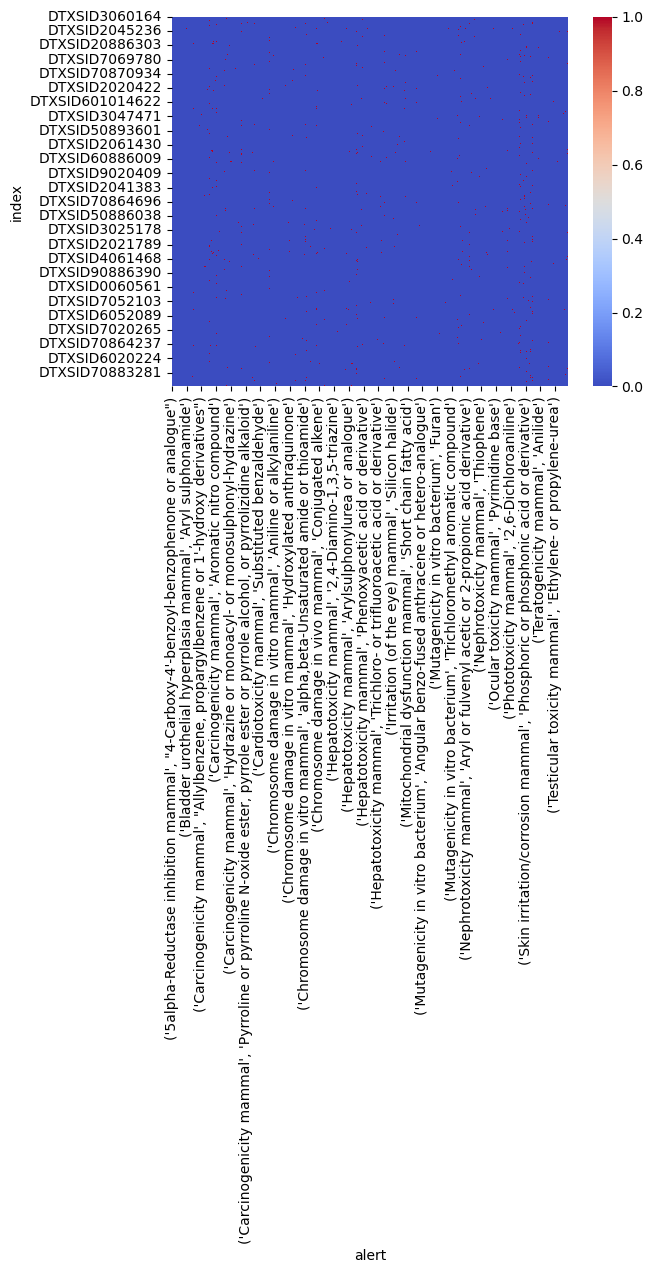

In [33]:
sns.heatmap(derek3, cmap = 'coolwarm')

In [34]:
from sklearn.manifold import TSNE

In [35]:
derek3 = derek2.copy()
derek3.index = derek3.loc[:,'group_str']
derek3

alert                                            ('5alpha-Reductase inhibition mammal', "4-Carboxy-4'-benzoyl-benzophenone or analogue")  \
group_str                                                                                                                                  
('Triphenyl compounds', nan)                                                                     0                                         
('Organohalogen compounds', 1.0)                                                                 0                                         
('Phenylpropanoids and polyketides', 2.0)                                                        0                                         
('Anthracenes', 2.0)                                                                             0                                         
('Organooxygen compounds', 3.0)                                                                  0                                         
...                                                                                            ...                                         
('Benzothiazoles', nan)                                                                          0                                         
('Fatty Acyls', 2.0)                                                                             0                                         
('Organic carbonic acids and derivatives', 2.0)                                                  0                                         
('Organooxygen compounds', 3.0)                                                                  0                                         
('Benzene and substituted derivatives', 6.0)                                                     0                                         

alert                                            ('Adrenal gland toxicity mammal', '2-Thio-benzimidazole, -benzothiazole or -benzoxazole')  \
group_str                                                                                                                                    
('Triphenyl compounds', nan)                                                                     0                                           
('Organohalogen compounds', 1.0)                                                                 0                                           
('Phenylpropanoids and polyketides', 2.0)                                                        0                                           
('Anthracenes', 2.0)                                                                             0                                           
('Organooxygen compounds', 3.0)                                                                  0                                           
...                                                                                            ...                                           
('Benzothiazoles', nan)                                                                          0                                           
('Fatty Acyls', 2.0)                                                                             0                                           
('Organic carbonic acids and derivatives', 2.0)                                                  0                                           
('Organooxygen compounds', 3.0)                                                                  0                                           
('Benzene and substituted derivatives', 6.0)                                                     0                                           

alert                                            ('Adrenal gland toxicity mammal', 'Adamantane')  \
group_str                                                                                          
('Triphenyl compounds', nan)                                                                   0   
('Organohalogen compounds', 1.0)

In [36]:
derek3.iloc[:,:-2]

alert                                            ('5alpha-Reductase inhibition mammal', "4-Carboxy-4'-benzoyl-benzophenone or analogue")  \
group_str                                                                                                                                  
('Triphenyl compounds', nan)                                                                     0                                         
('Organohalogen compounds', 1.0)                                                                 0                                         
('Phenylpropanoids and polyketides', 2.0)                                                        0                                         
('Anthracenes', 2.0)                                                                             0                                         
('Organooxygen compounds', 3.0)                                                                  0                                         
...                                                                                            ...                                         
('Benzothiazoles', nan)                                                                          0                                         
('Fatty Acyls', 2.0)                                                                             0                                         
('Organic carbonic acids and derivatives', 2.0)                                                  0                                         
('Organooxygen compounds', 3.0)                                                                  0                                         
('Benzene and substituted derivatives', 6.0)                                                     0                                         

alert                                            ('Adrenal gland toxicity mammal', '2-Thio-benzimidazole, -benzothiazole or -benzoxazole')  \
group_str                                                                                                                                    
('Triphenyl compounds', nan)                                                                     0                                           
('Organohalogen compounds', 1.0)                                                                 0                                           
('Phenylpropanoids and polyketides', 2.0)                                                        0                                           
('Anthracenes', 2.0)                                                                             0                                           
('Organooxygen compounds', 3.0)                                                                  0                                           
...                                                                                            ...                                           
('Benzothiazoles', nan)                                                                          0                                           
('Fatty Acyls', 2.0)                                                                             0                                           
('Organic carbonic acids and derivatives', 2.0)                                                  0                                           
('Organooxygen compounds', 3.0)                                                                  0                                           
('Benzene and substituted derivatives', 6.0)                                                     0                                           

alert                                            ('Adrenal gland toxicity mammal', 'Adamantane')  \
group_str                                                                                          
('Triphenyl compounds', nan)                                                                   0   
('Organohalogen compounds', 1.0)

In [37]:
results = {}
for i, group in derek2.groupby('group_str'):
    results[i] = group

In [38]:
import sys

In [39]:
LIB = TOP+'src/models/'
if not LIB in sys.path: 
    sys.path.insert(0,LIB)

In [40]:
from model_functions import *

In [41]:
dists = {}
for k, v in results.items():
    dists[k] = distance_matrix(v.iloc[:,:-2])

In [248]:
import pickle
pickle.dump( dists, open(interim_dir+ "dists_derek_041223.pkl", "wb" ) )

In [56]:
#dists["('Pyridines and derivatives', 1.0)"]

<Axes: xlabel='index', ylabel='index'>

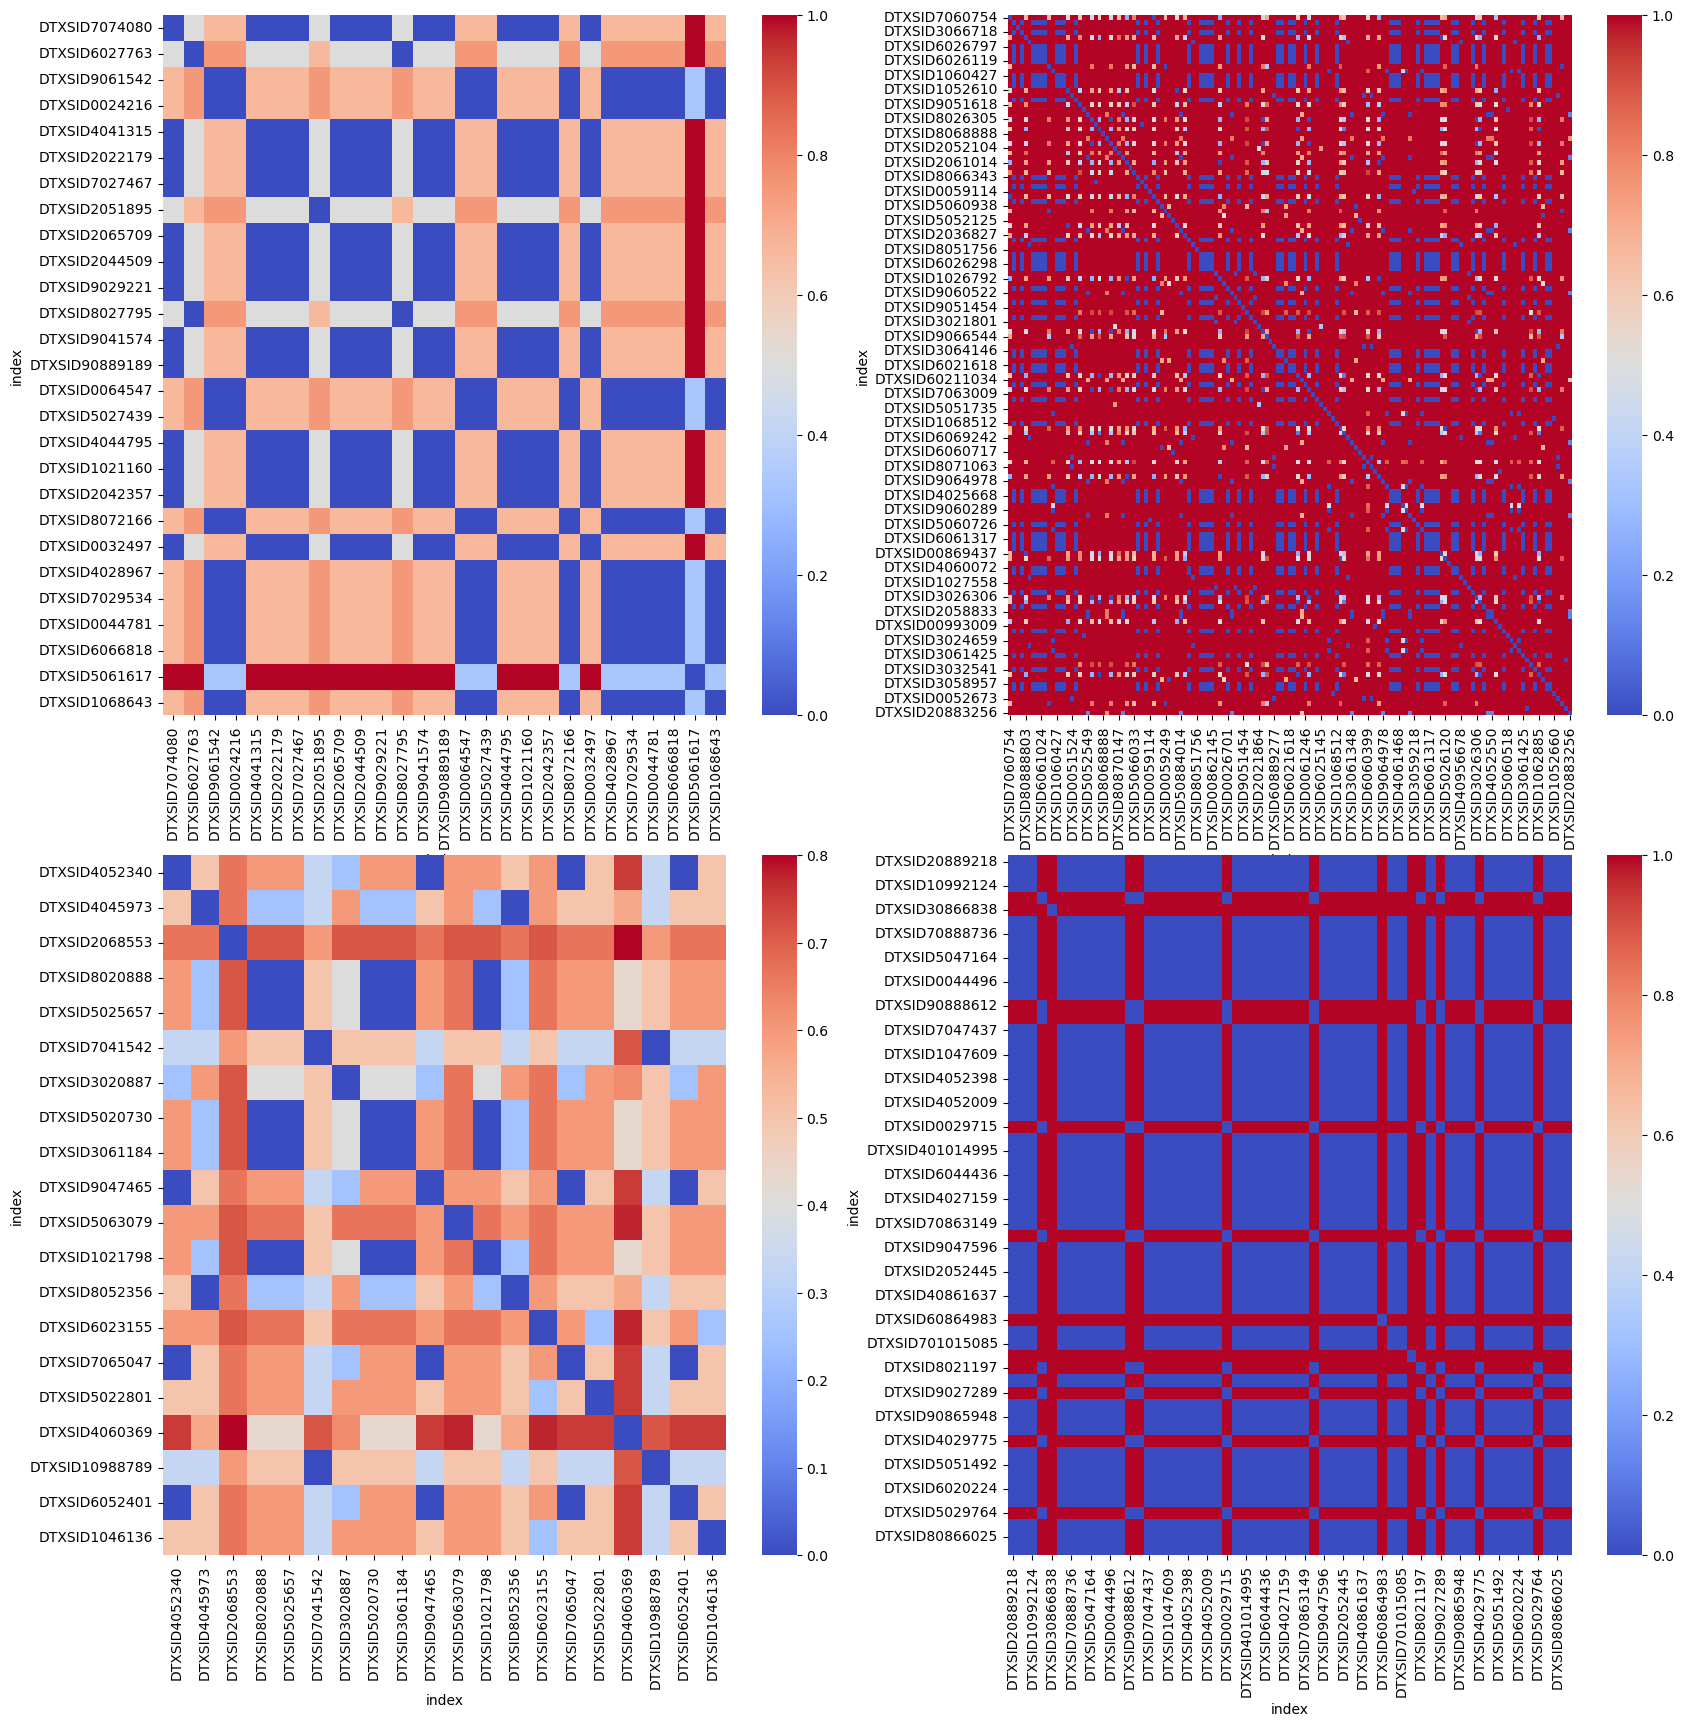

In [43]:
f, ax = plt.subplots(2,2, figsize = (20,20))
sns.heatmap(dists["('Pyridines and derivatives', 1.0)"], cmap = 'coolwarm', ax = ax[0,0])
sns.heatmap(dists["('Benzene and substituted derivatives', 9.0)"], cmap = 'coolwarm', ax = ax[0,1])
sns.heatmap(dists["('Quinolines and derivatives', 3.0)"], cmap = 'coolwarm', ax = ax[1,0])
sns.heatmap(dists["('Lactones', nan)"], cmap = 'coolwarm', ax = ax[1,1])



In [44]:
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
linkage = hc.linkage(sp.distance.squareform(dists["('Pyridines and derivatives', 1.0)"]), method='ward')

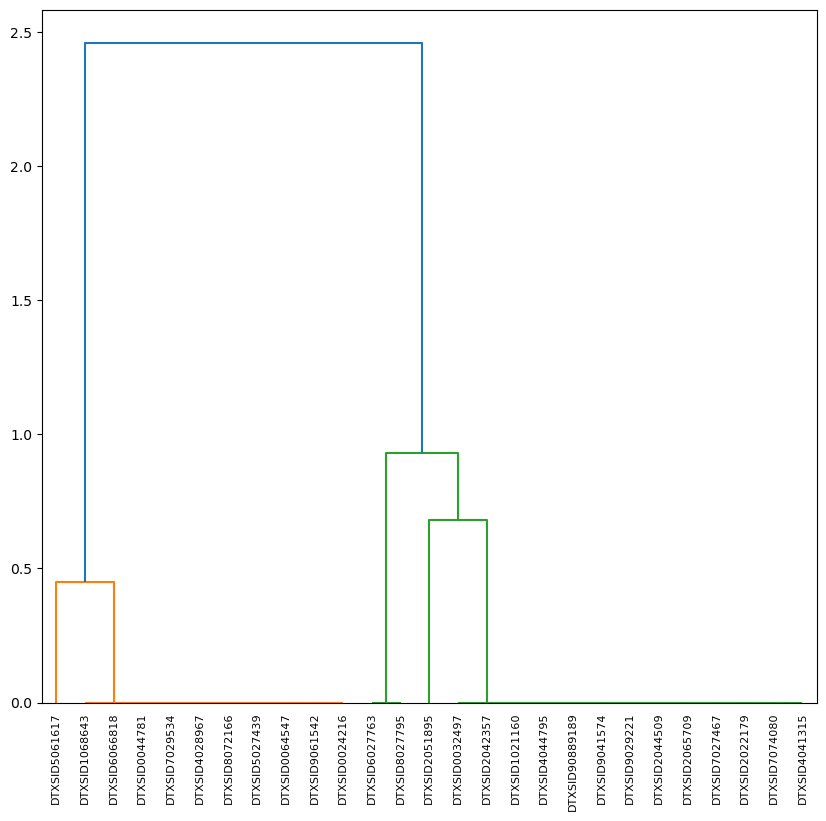

In [47]:
plt.figure(figsize=(10, 9))
dendrogram(
    linkage,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = test.index# font size for the x axis labels
)
plt.show()

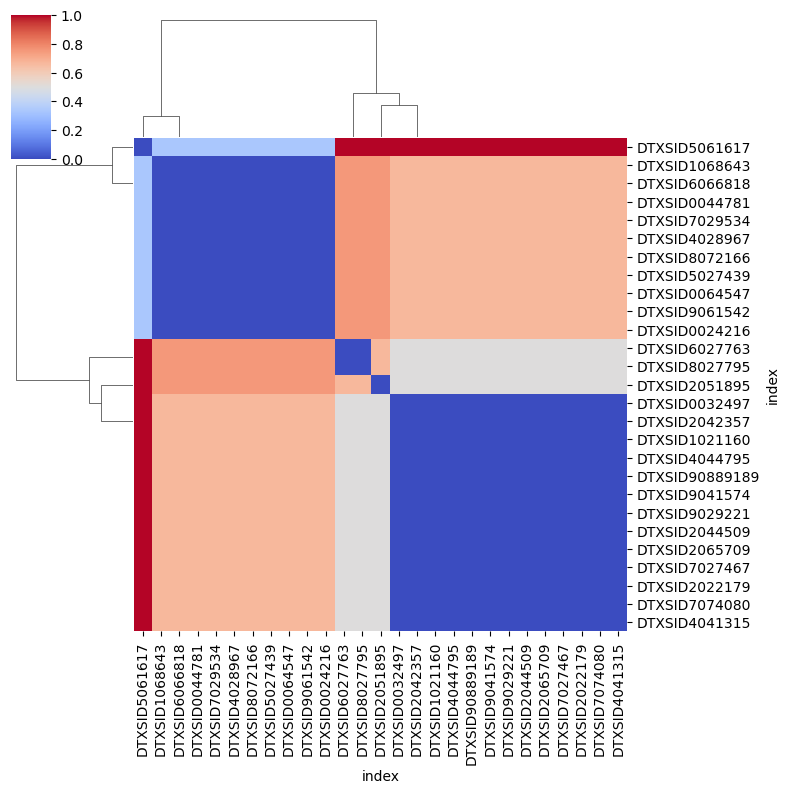

In [48]:
g = sns.clustermap(dists["('Pyridines and derivatives', 1.0)"], row_linkage=linkage, col_linkage=linkage, cmap = 'coolwarm', figsize = (8,8))

In [254]:
#[index_dict[b] for b in g.dendrogram_row.reordered_ind]

In [46]:
test = dists["('Pyridines and derivatives', 1.0)"] 

In [49]:
from scipy.cluster.hierarchy import fcluster

In [50]:
fcluster(linkage, t=0.7, criterion='distance')

array([3, 2, 1, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1,
       1, 1, 1, 1, 1], dtype=int32)

In [51]:
#test

In [52]:
clusters = pd.DataFrame(list(zip(test.index, fcluster(linkage, t=0.7, criterion='distance'))), columns = ['dtxsid', 'cluster_d'])


In [53]:
clusters = clusters.sort_values(by= 'cluster_d', ascending = True)

In [54]:
test.loc[['DTXSID90889189','DTXSID4044795'], ['DTXSID90889189','DTXSID4044795']]

index           DTXSID90889189  DTXSID4044795
index                                        
DTXSID90889189             0.0            0.0
DTXSID4044795              0.0            0.0

In [57]:
results["('Pyridines and derivatives', 1.0)"].loc[['DTXSID90889189','DTXSID4044795'],]

alert           ('5alpha-Reductase inhibition mammal', "4-Carboxy-4'-benzoyl-benzophenone or analogue")  \
index                                                                                                     
DTXSID90889189                                                  0                                         
DTXSID4044795                                                   0                                         

alert           ('Adrenal gland toxicity mammal', '2-Thio-benzimidazole, -benzothiazole or -benzoxazole')  \
index                                                                                                       
DTXSID90889189                                                  0                                           
DTXSID4044795                                                   0                                           

alert           ('Adrenal gland toxicity mammal', 'Adamantane')  \
index                                                             
DTXSID90889189                                                0   
DTXSID4044795                                                 0   

alert           ('Adrenal gland toxicity mammal', 'Bis-4-oxyaniline')  \
index                                                                   
DTXSID90889189                                                  0       
DTXSID4044795                                                   0       

alert           ('Adrenal gland toxicity mammal', 'Methylenebisphenol')  \
index                                                                     
DTXSID90889189                                                  0         
DTXSID4044795                                                   0         

alert           ('Adrenal gland toxicity mammal', 'Phenylethyltriazole or analogue')  \
index                                                                                  
DTXSID90889189                                                  0                      
DTXSID4044795                                                   0                      

alert           ('Androgen receptor modulation mammal', "[1,1'-Biphenyl]-4-carbonitrile or derivative")  \
index                                                                                                     
DTXSID90889189                                                  0                                         
DTXSID4044795                                                   0                                         

alert           ('Androgen receptor modulation mammal', '4-(2,5-Dioxopyrrolidin-1-yl)benzonitrile or analogue')  \
index                                                                                                             
DTXSID90889189                                                  0                                                 
DTXSID4044795                                                   0                                                 

alert           ('Androgen receptor modulation mammal', 'Chalcone derivative')  \
index                                                                            
DTXSID90889189                                                  0                
DTXSID4044795                                                   0                

alert           ('Androgen receptor modulation mammal', 'Quinoline or analogue')  \
index                                                                              
DTXSID90889189                                                  0                  
DTXSID4044795                                                   0                  

alert           ...  ('Urolithiasis mammal', 'Cidofovir-like')  \
index           ...                                              
DTXSID90889189  ...                                          0   
DTXSID4044795   ...                                          0   

alert           ('Urolithiasis mammal', 'Etidronic acid-like')  \
index                          

In [58]:
results["('Pyridines and derivatives', 1.0)"].columns[results["('Pyridines and derivatives', 1.0)"].loc['DTXSID1068643'] ==1]

Index(['('Carcinogenicity mammal', 'Di- to poly-halogenated alkane')',
       '('Hepatotoxicity mammal', '2-Halopyridine')',
       '('Mutagenicity in vitro bacterium', 'Trichloromethyl aromatic compound')'],
      dtype='object', name='alert')

In [59]:
results["('Pyridines and derivatives', 1.0)"].columns[results["('Pyridines and derivatives', 1.0)"].loc['DTXSID6066818'] ==1]

Index(['('Carcinogenicity mammal', 'Di- to poly-halogenated alkane')',
       '('Hepatotoxicity mammal', '2-Halopyridine')',
       '('Mutagenicity in vitro bacterium', 'Trichloromethyl aromatic compound')'],
      dtype='object', name='alert')

In [60]:
results["('Pyridines and derivatives', 1.0)"].columns[results["('Pyridines and derivatives', 1.0)"].loc['DTXSID6027763'] ==1]

Index(['('Hepatotoxicity mammal', '2-Halopyridine')',
       '('Nephrotoxicity mammal', 'Aromatic nitrile')', 'final_picks'],
      dtype='object', name='alert')

In [61]:
clusters_df = pd.merge(results["('Pyridines and derivatives', 1.0)"], clusters, left_on = results["('Pyridines and derivatives', 1.0)"].index, right_on = 'dtxsid', how = 'left')
clusters_df.to_csv(interim_dir+'pyridines_derivs.csv')

In [62]:
clusters_df.columns[(clusters_df[clusters_df['cluster_d'] ==3]).eq(1).any()]

Index(['('Hepatotoxicity mammal', '2-Halopyridine')',
       '('Skin irritation/corrosion mammal', 'Pyridine or analogue')',
       'final_picks'],
      dtype='object')

In [63]:
clusters_df.columns[(clusters_df[clusters_df['cluster_d'] ==2]).eq(1).any()]

Index(['('Hepatotoxicity mammal', '2-Halopyridine')',
       '('Nephrotoxicity mammal', 'Aromatic nitrile')', 'final_picks'],
      dtype='object')

In [64]:
clusters_df.columns[(clusters_df[clusters_df['cluster_d'] ==1]).eq(1).any()]

Index(['('Carcinogenicity mammal', 'Di- to poly-halogenated alkane')',
       '('Hepatotoxicity mammal', '2-Halopyridine')',
       '('Mutagenicity in vitro bacterium', 'Trichloromethyl aromatic compound')',
       'final_picks', 'cluster_d'],
      dtype='object')

In [65]:
linkage_c = hc.linkage(sp.distance.squareform(dists["('Quinolines and derivatives', 3.0)"]), method='ward')

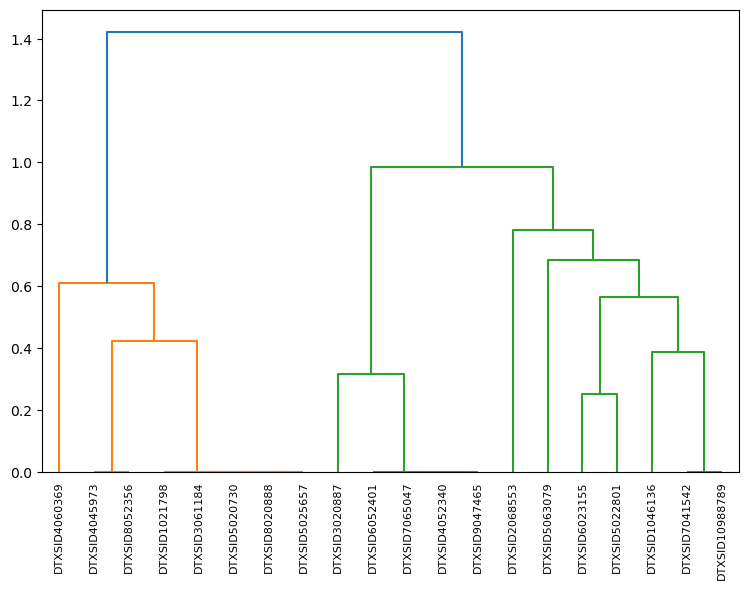

In [66]:
plt.figure(figsize=(9, 6))
dendrogram(
    linkage_c,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8., 
    labels = dists["('Quinolines and derivatives', 3.0)"].index# font size for the x axis labels
)
plt.show()

In [67]:
clusters_c = pd.DataFrame(list(zip(dists["('Quinolines and derivatives', 3.0)"].index, fcluster(linkage_c, t=0.7, criterion='distance'))), columns = ['dtxsid', 'cluster_d'])

In [68]:
clusters_c_df = pd.merge(results["('Quinolines and derivatives', 3.0)"], clusters_c, left_on = results["('Quinolines and derivatives', 3.0)"].index, right_on = 'dtxsid', how = 'left')
clusters_c_df.to_csv(interim_dir+'quinolines_derivs.csv')

In [69]:
clusters_c_df.columns[(clusters_c_df[clusters_c_df['cluster_d'] ==1]).eq(1).any()]

Index(['('Carcinogenicity mammal', 'Aromatic amine or amide')',
       '('Hepatotoxicity mammal', 'Quinoline')',
       '('Mutagenicity in vitro bacterium', 'Aromatic amine or amide')',
       '('Mutagenicity in vitro bacterium', 'Quinoline')',
       '('Mutagenicity in vivo mammal', 'Aromatic amine or amide')',
       '('Mutagenicity in vivo mammal', 'Quinoline')',
       '('Skin irritation/corrosion mammal', 'Pyridine or analogue')',
       'final_picks', 'cluster_d'],
      dtype='object')

In [70]:
clusters_c_df.columns[(clusters_c_df[clusters_c_df['cluster_d'] ==2]).eq(1).any()]

Index(['('Androgen receptor modulation mammal', 'Quinoline or analogue')',
       '('Mutagenicity in vitro bacterium', 'Quinoline')',
       '('Mutagenicity in vivo mammal', 'Quinoline')',
       '('Skin irritation/corrosion mammal', 'Pyridine or analogue')',
       'final_picks'],
      dtype='object')

In [71]:
clusters_c_df.columns[(clusters_c_df[clusters_c_df['cluster_d'] ==3]).eq(1).any()]

Index(['('Carcinogenicity mammal', 'Aromatic nitroso compound')',
       '('Carcinogenicity mammal', 'Polyhalogenated aromatic')',
       '('Mutagenicity in vitro bacterium', 'Aromatic nitroso compound')',
       '('Mutagenicity in vitro bacterium', 'Quinoline')',
       '('Mutagenicity in vivo mammal', 'Quinoline')',
       '('Thyroid toxicity mammal', 'Aromatic iodo compound')', 'final_picks'],
      dtype='object')

In [72]:
clusters_c_df.columns[(clusters_c_df[clusters_c_df['cluster_d'] ==4]).eq(1).any()]

Index(['('Carcinogenicity mammal', '4-Aminobiphenyl, benzidine, naphthylamine or precursors')',
       '('Carcinogenicity mammal', 'Aromatic azo compound')',
       '('Mutagenicity in vitro bacterium', 'Aromatic azo compound')',
       '('Mutagenicity in vitro bacterium', 'Quinoline')',
       '('Mutagenicity in vivo mammal', 'Quinoline')'],
      dtype='object')

In [73]:
len(results.keys())

172

In [74]:
#df.group_str.unique()

In [75]:
[e for e in df.group_str.unique().tolist() if e not in results.keys()]

[nan,
 "('Homogeneous metal compounds', nan)",
 "('Homogeneous non-metal compounds', 1.0)",
 "('Inorganic salts', nan)",
 "('Miscellaneous inorganic compounds', nan)",
 "('Mixed metal/non-metal compounds', 1.0)",
 "('Mixed metal/non-metal compounds', 2.0)",
 "('Mixed metal/non-metal compounds', 3.0)",
 "('Mixed metal/non-metal compounds', 4.0)"]

In [76]:
def clust_output(d, r, label = None):
    link = hc.linkage(sp.distance.squareform(d[label]), method='ward')
    clust = pd.DataFrame(list(zip(dists[label].index, fcluster(link, t=0.7, criterion='distance'))), columns = ['dtxsid', 'cluster_d'])
    clust_df = pd.merge(r[label], clust, left_on = r[label].index, right_on = 'dtxsid', how = 'left')
    return clust_df
    

In [77]:
def clust_out(clust_df, label = None):
    n = clust_df.cluster_d.nunique()
    alerts = {}
    for i in range(1, n):
        alerts[i] = clust_df.columns[(clust_df[clust_df['cluster_d'] ==n]).eq(1).any()]
    return   alerts

In [78]:
summaries = {}
for e in results.keys():
    try:
        summaries[e] = clust_output(dists, results, label = e)
    except Exception as error:
        print(e)

('Homogeneous non-metal compounds', 2.0)


In [79]:
alert_dict = {}
for e in summaries.keys():
    alert_dict[e] = clust_out(summaries[e])

In [80]:
alert_dict["('Acetylides', nan)"]

{1: Index(['('Carcinogenicity mammal', 'Alkylating agent')',
        '('Chromosome damage in vitro mammal', 'Alkylating agent')',
        '('Mutagenicity in vitro bacterium', 'Alkylating agent')',
        '('Skin irritation/corrosion mammal', 'Alkyl halide')'],
       dtype='object'),
 2: Index(['('Carcinogenicity mammal', 'Alkylating agent')',
        '('Chromosome damage in vitro mammal', 'Alkylating agent')',
        '('Mutagenicity in vitro bacterium', 'Alkylating agent')',
        '('Skin irritation/corrosion mammal', 'Alkyl halide')'],
       dtype='object')}

In [81]:
{k:len(v) for k, v in alert_dict.items() if len(v) == 0}

{"('Allenes', nan)": 0,
 "('Anthracenes', 5.0)": 0,
 "('Azobenzenes', 1.0)": 0,
 "('Azobenzenes', 5.0)": 0,
 "('Azobenzenes', 6.0)": 0,
 "('Azoles', 3.0)": 0,
 "('Hydrocarbons', 1.0)": 0,
 "('Mixed metal/non-metal compounds', 5.0)": 0,
 "('Organic oxygen compounds', nan)": 0,
 "('Phenylpropanoids and polyketides', 1.0)": 0}

In [84]:
alert_dict["('Allenes', nan)"]

{}

In [88]:
 results["('Allenes', nan)"].iloc[:,:-2].describe()

alert  ('5alpha-Reductase inhibition mammal', "4-Carboxy-4'-benzoyl-benzophenone or analogue")  \
count                                                2.0                                         
mean                                                 0.0                                         
std                                                  0.0                                         
min                                                  0.0                                         
25%                                                  0.0                                         
50%                                                  0.0                                         
75%                                                  0.0                                         
max                                                  0.0                                         

alert  ('Adrenal gland toxicity mammal', '2-Thio-benzimidazole, -benzothiazole or -benzoxazole')  \
count                                                2.0                                           
mean                                                 0.0                                           
std                                                  0.0                                           
min                                                  0.0                                           
25%                                                  0.0                                           
50%                                                  0.0                                           
75%                                                  0.0                                           
max                                                  0.0                                           

alert  ('Adrenal gland toxicity mammal', 'Adamantane')  \
count                                              2.0   
mean                                               0.0   
std                                                0.0   
min                                                0.0   
25%                                                0.0   
50%                                                0.0   
75%                                                0.0   
max                                                0.0   

alert  ('Adrenal gland toxicity mammal', 'Bis-4-oxyaniline')  \
count                                                2.0       
mean                                                 0.0       
std                                                  0.0       
min                                                  0.0       
25%                                                  0.0       
50%                                                  0.0       
75%                                                  0.0       
max                                                  0.0       

alert  ('Adrenal gland toxicity mammal', 'Methylenebisphenol')  \
count                                                2.0         
mean                                                 0.0         
std                                                  0.0         
min                                                  0.0         
25%                                                  0.0         
50%                                                  0.0         
75%                                                  0.0         
max                                                  0.0         

alert  ('Adrenal gland toxicity mammal', 'Phenylethyltriazole or analogue')  \
count                                                2.0                      
mean                                                 0.0                      
std                                                  0.0                      
min                                                  0.0                      
25%                                                  0.0                      
50%                                            

In [82]:
for k, v in alert_dict.items():
    if len(v) ==0:
        print(k, results[k].iloc[:,:-2].shape)

('Allenes', nan) (2, 619)
('Anthracenes', 5.0) (17, 619)
('Azobenzenes', 1.0) (7, 619)
('Azobenzenes', 5.0) (13, 619)
('Azobenzenes', 6.0) (23, 619)
('Azoles', 3.0) (4, 619)
('Hydrocarbons', 1.0) (50, 619)
('Mixed metal/non-metal compounds', 5.0) (5, 619)
('Organic oxygen compounds', nan) (6, 619)
('Phenylpropanoids and polyketides', 1.0) (14, 619)


In [337]:
for k,v in alert_dict.items():
    if len(v) ==0:
        if len(results[k].iloc[:,:-2].columns[results[k].iloc[:,:-2].eq(1).any()]) == 0:
            print(k, results[k].iloc[:,:-2].columns[results[k].iloc[:,:-2].eq(1).any()])

('Allenes', nan) Index([], dtype='object', name='alert')
('Hydrocarbons', 1.0) Index([], dtype='object', name='alert')
('Mixed metal/non-metal compounds', 5.0) Index([], dtype='object', name='alert')
('Phenylpropanoids and polyketides', 1.0) Index([], dtype='object', name='alert')


In [107]:
for k,v in alert_dict.items():
    if len(v) ==0:
        if len(results[k].iloc[:,:-2].columns[results[k].iloc[:,:-2].eq(1).any()]) != 0:
            print(k, len(results[k].iloc[:,:-2].columns[results[k].iloc[:,:-2].eq(1).any()]), results[k].iloc[:,:-2].shape[0])
            #print(k)

('Anthracenes', 5.0) 18 17
('Azobenzenes', 1.0) 9 7
('Azobenzenes', 5.0) 15 13
('Azobenzenes', 6.0) 21 23
('Azoles', 3.0) 13 4
('Organic oxygen compounds', nan) 9 6


In [110]:
results["('Anthracenes', 5.0)"][results["('Anthracenes', 5.0)"].iloc[:,:-2].columns[results["('Anthracenes', 5.0)"].iloc[:,:-2].eq(1).all()].tolist()]

alert           ('Carcinogenicity mammal', 'Anthraquinone')  \
index                                                         
DTXSID40888142                                            1   
DTXSID7068926                                             1   
DTXSID7069364                                             1   
DTXSID7074614                                             1   
DTXSID8067361                                             1   
DTXSID5068235                                             1   
DTXSID2072918                                             1   
DTXSID8066391                                             1   
DTXSID2025210                                             1   
DTXSID1066447                                             1   
DTXSID8069351                                             1   
DTXSID90863126                                            1   
DTXSID7066196                                             1   
DTXSID6070483                                             1   
DTXSID7067823                                             1   
DTXSID6066313                                             1   
DTXSID7066271                                             1   

alert           ('Chromosome damage in vitro mammal', 'Hydroxylated anthraquinone')  \
index                                                                                 
DTXSID40888142                                                  1                     
DTXSID7068926                                                   1                     
DTXSID7069364                                                   1                     
DTXSID7074614                                                   1                     
DTXSID8067361                                                   1                     
DTXSID5068235                                                   1                     
DTXSID2072918                                                   1                     
DTXSID8066391                                                   1                     
DTXSID2025210                                                   1                     
DTXSID1066447                                                   1                     
DTXSID8069351                                                   1                     
DTXSID90863126                                                  1                     
DTXSID7066196                                                   1                     
DTXSID6070483                                                   1                     
DTXSID7067823                                                   1                     
DTXSID6066313                                                   1                     
DTXSID7066271                                                   1                     

alert           ('Chromosome damage in vivo mammal', 'Hydroxylated anthraquinone')  \
index                                                                                
DTXSID40888142                                                  1                    
DTXSID7068926                                                   1                    
DTXSID7069364                                                   1                    
DTXSID7074614                                                   1                    
DTXSID8067361                                                   1                    
DTXSID5068235                                                   1                    
DTXSID2072918                                                   1                    
DTXSID8066391                                                   1                    
DTXSID2025210                                                   1                    
DTXSID1066447                                                   1                    
DTXSID8069351                                                   1                    
DTXSID90863126                

<Axes: xlabel='alert', ylabel='index'>

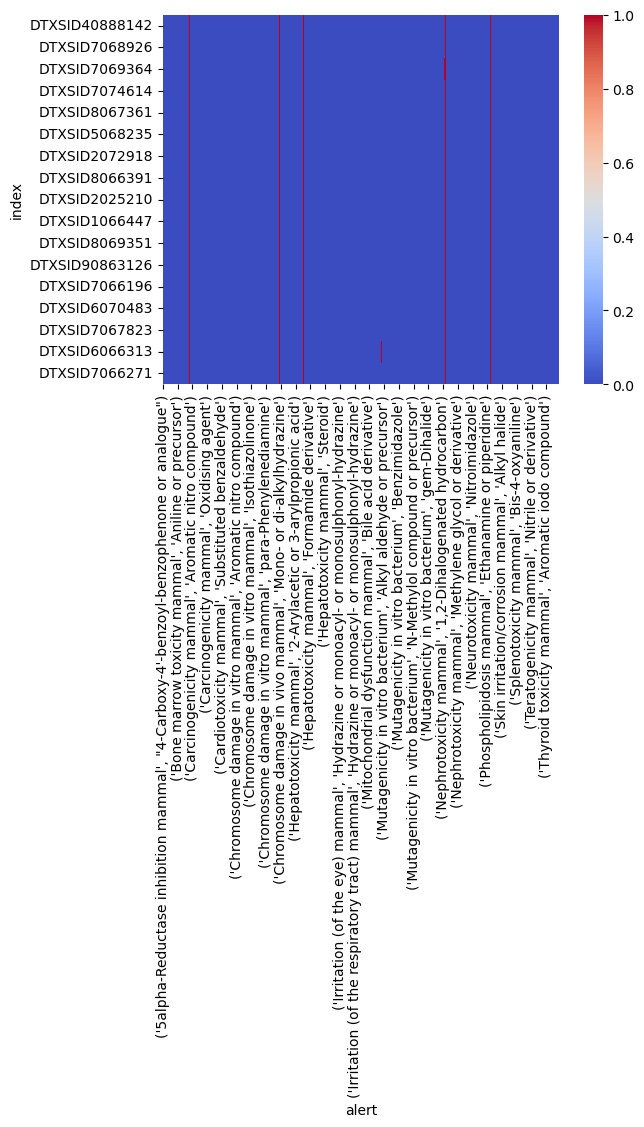

In [97]:
sns.heatmap(results["('Anthracenes', 5.0)"].iloc[:,:-2], cmap = 'coolwarm')

In [305]:
myalerts = []
for k,v in list(alert_dict.items()):
    if len(v) !=0:
        myalerts.append([k,len(v)])

In [360]:
pd.DataFrame(myalerts, columns = ['terminal category', 'number of alerts']).sort_values(by = 'number of alerts').describe()

number of alerts
count        161.000000
mean          13.186335
std           16.435178
min            1.000000
25%            4.000000
50%            6.000000
75%           15.000000
max          101.000000

In [306]:
pd.DataFrame(myalerts, columns = ['terminal category', 'number of alerts']).sort_values(by = 'number of alerts')

terminal category  number of alerts
12                            ('Azobenzenes', 4.0)                 1
75        ('Lipids and lipid-like molecules', nan)                 1
104               ('Organohalogen compounds', 1.0)                 1
64        ('Homogeneous non-metal compounds', 3.0)                 1
65        ('Homogeneous non-metal compounds', 4.0)                 1
..                                             ...               ...
148                         ('Prenol lipids', 2.0)                62
108          ('Organoheterocyclic compounds', 1.0)                63
27   ('Benzene and substituted derivatives', 10.0)                71
28    ('Benzene and substituted derivatives', 2.0)                97
34    ('Benzene and substituted derivatives', 8.0)               101

[161 rows x 2 columns]

In [363]:
pd.DataFrame(myalerts, columns = ['terminal category', 'number of alerts']).to_csv(interim_dir+'derekalertcount_termcategories.csv')

<Axes: ylabel='Frequency'>

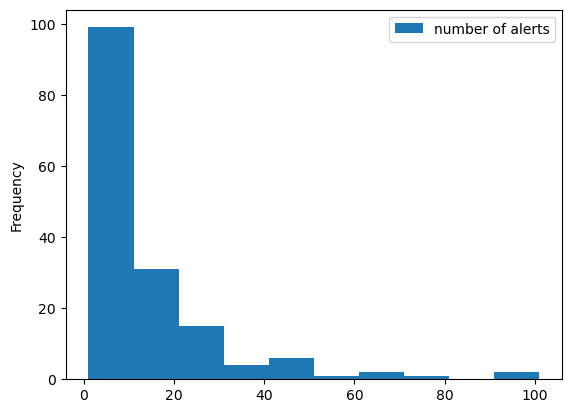

In [362]:
pd.DataFrame(myalerts, columns = ['terminal category', 'number of alerts']).sort_values(by = 'number of alerts').plot(kind = 'hist')

In [130]:
picks_alerts = derek2[derek2['final_picks'] ==1].iloc[:,:-2].columns[derek2[derek2['final_picks'] ==1].iloc[:,:-2].eq(1).any()].tolist()

In [131]:
all_alerts = derek2.iloc[:,:-2].columns[derek2.iloc[:,:-2].eq(1).any()].tolist()

In [148]:
len(list(set([e.split(',')[0] for e in all_alerts ])))

53

In [149]:
len(list(set([e.split(',')[0] for e in picks_alerts ])))

36

In [150]:
36/53

0.6792452830188679

In [151]:
217/619

0.3505654281098546

In [188]:
alerts_dict2 = {}
my_sa = []
for e in all_alerts:
    ks = list(set([e.split(',')[0] for e in all_alerts ]))
    for k in ks:
        if k == e.split(',')[0]:
            alerts_dict2[k] = e
            

        

In [191]:
alerts_dict2 = {}

# Iterate over each element in all_alerts
for e in all_alerts:
    # Extract the first element from the current element
    key = e.split(',')[0]
    
    # Check if the key already exists in the dictionary
    if key in alerts_dict2:
        # If the key exists, append the current element to its list of values
        alerts_dict2[key].append(e)
    else:
        # If the key doesn't exist, create a new key-value pair with the current element as the value in a list
        alerts_dict2[key] = [e]

In [243]:
alerts_dict2.keys()

dict_keys(["('5alpha-Reductase inhibition mammal'", "('Adrenal gland toxicity mammal'", "('Androgen receptor modulation mammal'", "('Bladder disorders mammal'", "('Bladder urothelial hyperplasia mammal'", "('Blood in urine mammal'", "('Bone marrow toxicity mammal'", "('Bradycardia mammal'", "('Carcinogenicity mammal'", "('Cardiotoxicity mammal'", "('Chloracne mammal'", "('Cholinesterase inhibition mammal'", "('Chromosome damage in vitro mammal'", "('Chromosome damage in vivo mammal'", "('Cumulative effect on white cell count and immunology mammal'", "('Cyanide-type effects mammal'", "('Developmental toxicity mammal'", "('Glucocorticoid receptor agonism mammal'", "('HERG channel inhibition in vitro mammal'", "('Hepatotoxicity mammal'", "('High acute toxicity mammal'", "('Irritation (of the eye) mammal'", "('Irritation (of the gastrointestinal tract) mammal'", "('Irritation (of the respiratory tract) mammal'", "('Kidney disorders mammal'", "('Kidney function-related toxicity mammal'", "(

In [267]:
new_df = pd.DataFrame(columns = alerts_dict2.keys(),index = group_str_dict.keys())
new_df

('5alpha-Reductase inhibition mammal'  \
('Acetylides', nan)                                                         NaN   
('Alkaloids and derivatives', nan)                                          NaN   
('Allenes', nan)                                                            NaN   
('Anthracenes', 1.0)                                                        NaN   
('Anthracenes', 2.0)                                                        NaN   
...                                                                         ...   
('Quinolines and derivatives', 4.0)                                         NaN   
('Quinolines and derivatives', 5.0)                                         NaN   
('Steroids and steroid derivatives', nan)                                   NaN   
('Triazines', nan)                                                          NaN   
('Triphenyl compounds', nan)                                                NaN   

                                          ('Adrenal gland toxicity mammal'  \
('Acetylides', nan)                                                    NaN   
('Alkaloids and derivatives', nan)                                     NaN   
('Allenes', nan)                                                       NaN   
('Anthracenes', 1.0)                                                   NaN   
('Anthracenes', 2.0)                                                   NaN   
...                                                                    ...   
('Quinolines and derivatives', 4.0)                                    NaN   
('Quinolines and derivatives', 5.0)                                    NaN   
('Steroids and steroid derivatives', nan)                              NaN   
('Triazines', nan)                                                     NaN   
('Triphenyl compounds', nan)                                           NaN   

                                          ('Androgen receptor modulation mammal'  \
('Acetylides', nan)                                                          NaN   
('Alkaloids and derivatives', nan)                                           NaN   
('Allenes', nan)                                                             NaN   
('Anthracenes', 1.0)                                                         NaN   
('Anthracenes', 2.0)                                                         NaN   
...                                                                          ...   
('Quinolines and derivatives', 4.0)                                          NaN   
('Quinolines and derivatives', 5.0)                                          NaN   
('Steroids and steroid derivatives', nan)                                    NaN   
('Triazines', nan)                                                           NaN   
('Triphenyl compounds', nan)                                                 NaN   

                                          ('Bladder disorders mammal'  \
('Acetylides', nan)                                               NaN   
('Alkaloids and derivatives', nan)                                NaN   
('Allenes', nan)                                                  NaN   
('Anthracenes', 1.0)                                              NaN   
('Anthracenes', 2.0)                                              NaN   
...                                                               ...   
('Quinolines and derivatives', 4.0)                               NaN   
('Quinolines and derivatives', 5.0)                               NaN   
('Steroids and steroid derivatives', nan)                         NaN   
('Triazines', nan)                                                NaN   
('Triphenyl compounds', nan)                                      NaN   

                                          ('Bladder urothelial hyperplasia mammal'  \
('Acetylides', nan)                                                            NaN   
('Alkaloids and derivatives', nan)                

In [215]:
group_str_dict = {k:list(v.index) for k,v in derek2.groupby('group_str')}
    

In [256]:
list(group_str_dict.keys())[:10]

["('Acetylides', nan)",
 "('Alkaloids and derivatives', nan)",
 "('Allenes', nan)",
 "('Anthracenes', 1.0)",
 "('Anthracenes', 2.0)",
 "('Anthracenes', 3.0)",
 "('Anthracenes', 4.0)",
 "('Anthracenes', 5.0)",
 "('Anthracenes', 6.0)",
 "('Anthracenes', 7.0)"]

In [293]:
for row in new_df.index:
    for col in new_df.columns:
        a = derek2[derek2['group_str'] ==row] [alerts_dict2[col]].sum(axis = 1).sum()
        new_df.loc[row,col] = a
                                    

In [301]:
new_df.to_csv(interim_dir+'derek_map.csv')

In [302]:
new_df.shape

(172, 53)

In [308]:
new_df

('5alpha-Reductase inhibition mammal'  \
('Acetylides', nan)                                                           0   
('Alkaloids and derivatives', nan)                                            0   
('Allenes', nan)                                                              0   
('Anthracenes', 1.0)                                                          0   
('Anthracenes', 2.0)                                                          0   
...                                                                         ...   
('Quinolines and derivatives', 4.0)                                           0   
('Quinolines and derivatives', 5.0)                                           0   
('Steroids and steroid derivatives', nan)                                     0   
('Triazines', nan)                                                            0   
('Triphenyl compounds', nan)                                                  0   

                                          ('Adrenal gland toxicity mammal'  \
('Acetylides', nan)                                                      0   
('Alkaloids and derivatives', nan)                                       0   
('Allenes', nan)                                                         0   
('Anthracenes', 1.0)                                                     0   
('Anthracenes', 2.0)                                                     0   
...                                                                    ...   
('Quinolines and derivatives', 4.0)                                      0   
('Quinolines and derivatives', 5.0)                                      0   
('Steroids and steroid derivatives', nan)                                0   
('Triazines', nan)                                                       0   
('Triphenyl compounds', nan)                                             0   

                                          ('Androgen receptor modulation mammal'  \
('Acetylides', nan)                                                            0   
('Alkaloids and derivatives', nan)                                             1   
('Allenes', nan)                                                               0   
('Anthracenes', 1.0)                                                           0   
('Anthracenes', 2.0)                                                           0   
...                                                                          ...   
('Quinolines and derivatives', 4.0)                                            3   
('Quinolines and derivatives', 5.0)                                            0   
('Steroids and steroid derivatives', nan)                                      0   
('Triazines', nan)                                                             0   
('Triphenyl compounds', nan)                                                   0   

                                          ('Bladder disorders mammal'  \
('Acetylides', nan)                                                 0   
('Alkaloids and derivatives', nan)                                  1   
('Allenes', nan)                                                    0   
('Anthracenes', 1.0)                                                0   
('Anthracenes', 2.0)                                                0   
...                                                               ...   
('Quinolines and derivatives', 4.0)                                 0   
('Quinolines and derivatives', 5.0)                                 0   
('Steroids and steroid derivatives', nan)                           0   
('Triazines', nan)                                                  0   
('Triphenyl compounds', nan)                                        0   

                                          ('Bladder urothelial hyperplasia mammal'  \
('Acetylides', nan)                                                              0   
('Alkaloids and derivatives', nan)                

In [319]:
new_df[new_df["('5alpha-Reductase inhibition mammal'"] > 5].index

Index([], dtype='object')

In [332]:
most_endpoints = {}
for col in new_df.columns:
    a = new_df[new_df[col] >50].index
    if len(a) >=1:
        most_endpoints[col] = a

In [334]:
top_cats = pd.DataFrame(list(most_endpoints.items()))
top_cat = top_cats.explode(1)

# Explode the 'Values' column
top_cat.columns = ['Endpoint', 'Terminal_Category']
top_cat.to_csv(external_dir+'top_derek.csv')

In [335]:
top_cat

Endpoint  \
0   ('Bone marrow toxicity mammal'   
1        ('Carcinogenicity mammal'   
1        ('Carcinogenicity mammal'   
1        ('Carcinogenicity mammal'   
1        ('Carcinogenicity mammal'   
..                             ...   
17        ('Splenotoxicity mammal'   
17        ('Splenotoxicity mammal'   
17        ('Splenotoxicity mammal'   
18        ('Teratogenicity mammal'   
18        ('Teratogenicity mammal'   

                                Terminal_Category  
0   ('Benzene and substituted derivatives', 10.0)  
1                            ('Anthracenes', 9.0)  
1                            ('Azobenzenes', 4.0)  
1   ('Benzene and substituted derivatives', 10.0)  
1    ('Benzene and substituted derivatives', 2.0)  
..                                            ...  
17  ('Benzene and substituted derivatives', 10.0)  
17   ('Benzene and substituted derivatives', 3.0)  
17   ('Benzene and substituted derivatives', 8.0)  
18            ('Organic nitrogen compounds', 1.0)  
18                         ('Prenol lipids', 2.0)  

[133 rows x 2 columns]

### Top ToxCast

In [338]:
top_txcst = pd.read_csv(external_dir+'toxcast_cats.csv', index_col = [0])

In [345]:
print(top_txcst.shape, top_cat.shape)

(40, 2) (133, 2)


In [343]:
top_cat.columns = ['Assay', 'Terminal_Category']

In [502]:
catmos = pd.read_csv(interim_dir+'catmos_medians.csv', index_col = [0])
catmos = catmos.dropna()

<Axes: >

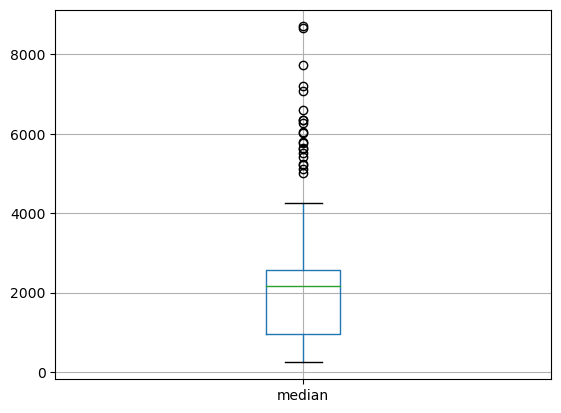

In [505]:
catmos.boxplot()

In [516]:
def acute_range(s):
    if s <50:
        return 'cat1_2'
    elif 300 > s >=50:
        return 'cat3'
    elif 2000 >= s >= 300:
        return 'cat4'
    else:
        return 'cat5'
    
    

In [524]:
catmos['Assay'] = catmos['median'].apply(lambda x: acute_range(x))

In [527]:
catmos.columns = ['Median', 'Terminal_Category', 'Assay']

In [528]:
df2 = pd.concat([top_cat, top_txcst, catmos])

In [529]:
df2

Assay  \
0   ('Bone marrow toxicity mammal'   
1        ('Carcinogenicity mammal'   
1        ('Carcinogenicity mammal'   
1        ('Carcinogenicity mammal'   
1        ('Carcinogenicity mammal'   
..                             ...   
68                            cat5   
63                            cat5   
46                            cat5   
64                            cat5   
42                            cat5   

                                Terminal_Category  Median  
0   ('Benzene and substituted derivatives', 10.0)     NaN  
1                            ('Anthracenes', 9.0)     NaN  
1                            ('Azobenzenes', 4.0)     NaN  
1   ('Benzene and substituted derivatives', 10.0)     NaN  
1    ('Benzene and substituted derivatives', 2.0)     NaN  
..                                            ...     ...  
68                         ('Glycerolipids', nan)  7074.0  
63                           ('Fatty Acyls', 2.0)  7204.0  
46                            ('Benzenoids', 5.0)  7723.0  
64                           ('Fatty Acyls', 3.0)  8670.5  
42                            ('Benzenoids', 1.0)  8697.5  

[343 rows x 3 columns]

In [530]:
import networkx as nx
import matplotlib.pyplot as plt 
import ast

In [531]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 42
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Assay              343 non-null    object 
 1   Terminal_Category  343 non-null    object 
 2   Median             170 non-null    float64
dtypes: float64(1), object(2)
memory usage: 10.7+ KB


In [554]:

df2['Assay'] = [e.strip('(').replace("mammal", '').replace("in vitro", "").replace("in vivo", "").rstrip(" '").lstrip("'") for e in df2['Assay']]

In [555]:
df2.to_csv(external_dir+'derek_txcast.csv')

In [564]:
df2['Terminal_Category'] = [str(e) for e in df2['Terminal_Category']]

In [557]:
#{k:v for k,v in zip(set(df2['Terminal_Category']),  set(df2['Terminal_Category']))}

In [417]:
mydict ={"('Organooxygen compounds', 3.0)": "Organooxygen compounds-3.0",
 "('Carboxylic acids and derivatives', 1.0)": "Carboxylic acids and derivatives-1.0",
 "('Organic nitrogen compounds', 1.0)": "Organic nitrogen compounds-1.0",
 "('Benzene and substituted derivatives', 5.0)": "Benzene and substituted derivatives-5.0",
 "('Prenol lipids', 1.0)": "Prenol lipids-1.0",
 "('Organoheterocyclic compounds', 1.0)": "Organoheterocyclic compounds-1.0",
 "('Naphthalenes', 1.0)": "Naphthalenes-1.0",
 "('Carboxylic acids and derivatives', 2.0)": "('Carboxylic acids and derivatives-2.0",
 "('Prenol lipids', 2.0)": "Prenol lipids-2.0",
 "('Benzene and substituted derivatives', 2.0)": "Benzene and substituted derivatives-2.0",
 "('Organooxygen compounds', 5.0)": "Organooxygen compounds-5.0",
 "('Organometallic compounds', 2.0)": "Organometallic compounds-2.0",
 "('Naphthalenes', 4.0)": "Naphthalenes-4.0",
 "('Organoheterocyclic compounds', 3.0)": "Organoheterocyclic compounds-3.0",
 "('Fatty Acyls', 1.0)": "Fatty Acyls-1.0",
 "('Organohalogen compounds', 4.0)": "Organohalogen compounds-4.0",
 "('Benzene and substituted derivatives', 10.0)": "Benzene and substituted derivatives-10.0",
 "('Azobenzenes', 4.0)": "Azobenzenes-4.0",
 "('Organic nitrogen compounds', 3.0)": "Organic nitrogen compounds-3.0",
 "('Benzene and substituted derivatives', 8.0)": "Benzene and substituted derivatives-8.0",
 "('Benzene and substituted derivatives', 6.0)": "Benzene and substituted derivatives-6.0",
 "('Organic nitrogen compounds', 4.0)": "Organic nitrogen compounds-4.0",
 "('Organometallic compounds', 3.0)": "Organometallic compounds-3.0",
 "('Benzene and substituted derivatives', 1.0)": "Benzene and substituted derivatives-1.0",
 "('Carboxylic acids and derivatives', 5.0)": "Carboxylic acids and derivatives-5.0",
 "('Organooxygen compounds', 1.0)": "Organooxygen compounds-1.0",
 "('Organohalogen compounds', 1.0)": "Organohalogen compounds-1.0",
 "('Organic nitrogen compounds', 6.0)": "Organic nitrogen compounds-6.0",
 "('Organooxygen compounds', 4.0)": "Organooxygen compounds-4.0",
 "('Organohalogen compounds', 2.0)": "Organohalogen compounds-2.0",
 "('Benzene and substituted derivatives', 3.0)": "Benzene and substituted derivatives-3.0",
 "('Organooxygen compounds', 2.0)": "Organooxygen compounds-2.0",
 "('Phenylpropanoids and polyketides', 4.0)": "Phenylpropanoids and polyketides-4.0",
 "('Carboxylic acids and derivatives', 4.0)": "Carboxylic acids and derivatives-4.0",
 "('Anthracenes', 9.0)": "Anthracenes-9.0",
 "('Organic phosphonic acids and derivatives', nan)": "Organic phosphonic acids and derivatives",
 "('Organic nitrogen compounds', 5.0)": "Organic nitrogen compounds-5.0",
 "('Organohalogen compounds', 3.0)": "Organohalogen compounds-3.0"}

In [454]:
mydict ={"('Organooxygen compounds', 3.0)": "Organooxygen",
 "('Carboxylic acids and derivatives', 1.0)": "COOH",
 "('Organic nitrogen compounds', 1.0)": "Organic N",
 "('Benzene and substituted derivatives', 5.0)": "Benzene derivatives",
 "('Prenol lipids', 1.0)": "Prenol lipids",
 "('Organoheterocyclic compounds', 1.0)": "Organoheterocyclic",
 "('Naphthalenes', 1.0)": "Naphthalenes",
 "('Carboxylic acids and derivatives', 2.0)": "COOH",
 "('Prenol lipids', 2.0)": "Prenol lipids",
 "('Benzene and substituted derivatives', 2.0)": "Benzene derivatives",
 "('Organooxygen compounds', 5.0)": "Organooxygen",
 "('Organometallic compounds', 2.0)": "Organometallic",
 "('Naphthalenes', 4.0)": "Naphthalenes",
 "('Organoheterocyclic compounds', 3.0)": "Organoheterocyclic",
 "('Fatty Acyls', 1.0)": "Fatty Acyls",
 "('Organohalogen compounds', 4.0)": "Organohalogen",
 "('Benzene and substituted derivatives', 10.0)": "Benzene derivatives",
 "('Azobenzenes', 4.0)": "Azobenzenes",
 "('Organic nitrogen compounds', 3.0)": "Organic N",
 "('Benzene and substituted derivatives', 8.0)": "Benzene derivatives",
 "('Benzene and substituted derivatives', 6.0)": "Benzene derivatives",
 "('Organic nitrogen compounds', 4.0)": "Organic N",
 "('Organometallic compounds', 3.0)": "Organometallic",
 "('Benzene and substituted derivatives', 1.0)": "Benzene derivatives",
 "('Carboxylic acids and derivatives', 5.0)": "COOH",
 "('Organooxygen compounds', 1.0)": "Organooxygen",
 "('Organohalogen compounds', 1.0)": "Organohalogen",
 "('Organic nitrogen compounds', 6.0)": "Organic N",
 "('Organooxygen compounds', 4.0)": "Organooxygen",
 "('Organohalogen compounds', 2.0)": "Organohalogen",
 "('Benzene and substituted derivatives', 3.0)": "Benzene derivatives",
 "('Organooxygen compounds', 2.0)": "Organooxygen",
 "('Phenylpropanoids and polyketides', 4.0)": "Phenylpropanoids",
 "('Carboxylic acids and derivatives', 4.0)": "COOH",
 "('Anthracenes', 9.0)": "Anthracenes",
 "('Organic phosphonic acids and derivatives', nan)": "Organic phosphonics",
 "('Organic nitrogen compounds', 5.0)": "Organic N",
 "('Organohalogen compounds', 3.0)": "Organohalogen"}

In [466]:
#mydict2 = {k:v for k,v in zip(set(df2['Assay']), set(df2['Assay']))}

In [455]:
#df2['Category'] = df2['Terminal_Category'].replace(mydict)

In [456]:
def replace_spaces_with_underscores(string):
    return string.replace(' ', '_')


In [470]:
#df2['Category'] = [replace_spaces_with_underscores(e) for e in df2['Category'] ]

In [471]:
#df2['Assay'] = [replace_spaces_with_underscores(e) for e in df2['Assay'] ]

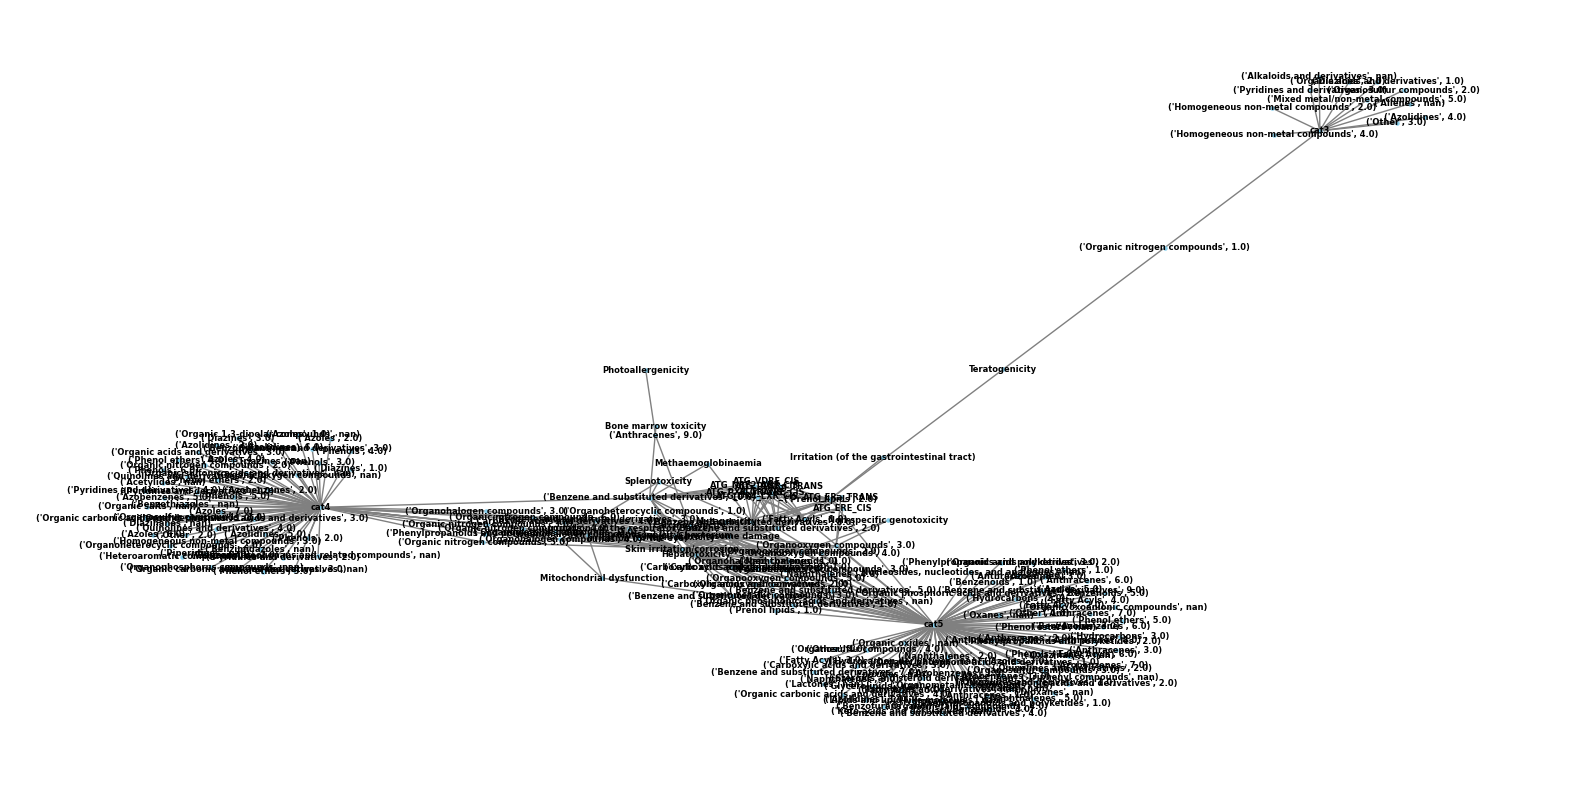

In [558]:
# Create a graph
G = nx.from_pandas_edgelist(df2, 'Terminal_Category', 'Assay')

# Create a new figure and axis
fig, ax = plt.subplots(figsize = (20,10))

# Position nodes using Fruchterman-Reingold force-directed algorithm
#pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, with_labels=True, node_size=5, node_color='skyblue', font_size=6, font_weight='bold', edge_color='gray', linewidths=1, arrowsize=20, ax=ax)

# Show the plot
plt.show()

In [572]:
df2['Terminal_Category']

0     ('Benzene and substituted derivatives', 10.0)
1                              ('Anthracenes', 9.0)
1                              ('Azobenzenes', 4.0)
1     ('Benzene and substituted derivatives', 10.0)
1      ('Benzene and substituted derivatives', 2.0)
                          ...                      
68                           ('Glycerolipids', nan)
63                             ('Fatty Acyls', 2.0)
46                              ('Benzenoids', 5.0)
64                             ('Fatty Acyls', 3.0)
42                              ('Benzenoids', 1.0)
Name: Terminal_Category, Length: 343, dtype: object

In [581]:
import re

def extract_alpha(text):
    return re.sub(r'[^a-zA-Z]', ' ', text)

In [582]:
df2['Category']= df2['Terminal_Category'].apply(lambda x: extract_alpha(x))

In [597]:
df2['Category'] = [e.strip(' ').replace('nan','').rstrip(' ')  for e in df2['Category']]

In [611]:
#mydict2 = {k:v for k,v in zip(set(df2['Category']), set(df2['Category']))}

In [612]:
mydict2 = {'Organosulfur compounds': 'Organosulfur',
 'Benzothiazoles': 'Benzothiazoles',
 'Ligs  neoligs and related compounds': 'Ligs/neoligs',
 'Lipids and lipid like molecules': 'Lipids and lipid like',
 'Pyridines and derivatives': 'Pyridine deriv',
 'Organic oxygen compounds': 'Organic oxygen',
 'Naphthalenes': 'Naphthalenes',
 'Piperidines': 'Piperidines',
 'Phenol ethers': 'Phenol ethers',
 'Anthracenes': 'Anthracenes',
 'Nucleosides  nucleotides  and analogues': 'Nucleosides/nucleotides',
 'Allenes': 'Allenes',
 'Keto acids and derivatives': 'Keto acid deriv',
 'Benzenoids': 'Benzenoids',
 'Mixed metal non metal compounds': 'Mixed metal/non metal',
 'Organometallic compounds': 'Organometallic compounds',
 'Organic carbonic acids and derivatives': 'Organic carbonic acid deriv',
 'Phenols': 'Phenols',
 'Benzimidazoles': 'Benzimidazoles',
 'Organic salts': 'Organic salts',
 'Organic acids and derivatives': 'Organic acid deriv',
 'Diazies': 'Diazies',
 'Organic oxoanionic compounds': 'Organic oxoanionic',
 'Steroids and steroid derivatives': 'Steroid deriv',
 'Azobenzenes': 'Azobenzenes',
 'Carboxylic acids and derivatives': 'COOH deriv',
 'Organic     dipolar compounds': 'Organic dipolar',
 'Indanes': 'Indanes',
 'Hydrocarbons': 'Hydrocarbons',
 'Epoxides': 'Epoxides',
 'Diazines': 'Diazines',
 'Organohalogen compounds': 'Organohalogen',
 'Acetylides': 'Acetylides',
 'Triazines': 'Triazines',
 'Homogeneous non metal compounds': 'Homogeneous non metal',
 'Benzene and substituted derivatives': 'Benzene substituted deriv',
 'Alkaloids and derivatives': 'Alkaloid deriv',
 'Quinolines and derivatives': 'Quinolines deriv',
 'Glycerolipids': 'Glycerolipids',
 'Azolidines': 'Azolidines',
 'Hydrocarbon derivatives': 'Hydrocarbons',
 'Phenol esters': 'Phenol esters',
 'Oxazies': 'Oxazies',
 'Prenol lipids': 'Prenol lipids',
 'Oxanes': 'Oxanes',
 'Fatty Acyls': 'Fatty Acyls',
 'Organoheterocyclic compounds': 'Organoheterocyclic',
 'Indoles and derivatives': 'Indoles deriv',
 'Organic oxides': 'Organic oxides',
 'Triphenyl compounds': 'Triphenyl',
 'Azoles': 'Azoles',
 'Organic nitrogen compounds': 'Organic nitrogen',
 'Phenylpropanoids and polyketides': 'Phenylpropanoids and polyketides',
 'Dioxanes': 'Dioxanes',
 'Organic phosphonic acids and derivatives': 'Organic phosphonic acids deriv',
 'Organic sulfonic acids and derivatives': 'Organic sulfonic acids deriv',
 'Benzofurans': 'Benzofurans',
 'Heteroaromatic compounds': 'Heteroaromatic',
 'Benzopyrans': 'Benzopyrans',
 'Lactones': 'Lactones',
 'Other': 'Other',
 'Organic phosphoric acids and derivatives': 'Organic phosphoric acid  deriv',
 'Organophosphorus compounds': 'Organophosphorus',
 'Isoindoles and derivatives': 'Isoindoles deriv',
 'Organooxygen compounds': 'Organooxygen'}

In [613]:
df2['Category2'] = df2['Category'].replace(mydict2)

In [623]:
df3 = df2[df2['Assay'].isin(['cat5', 'cat1_2', 'cat4', 'cat3'])]

In [624]:
df4 = df2[~df2['Assay'].isin(['cat5', 'cat1_2', 'cat4', 'cat3'])]

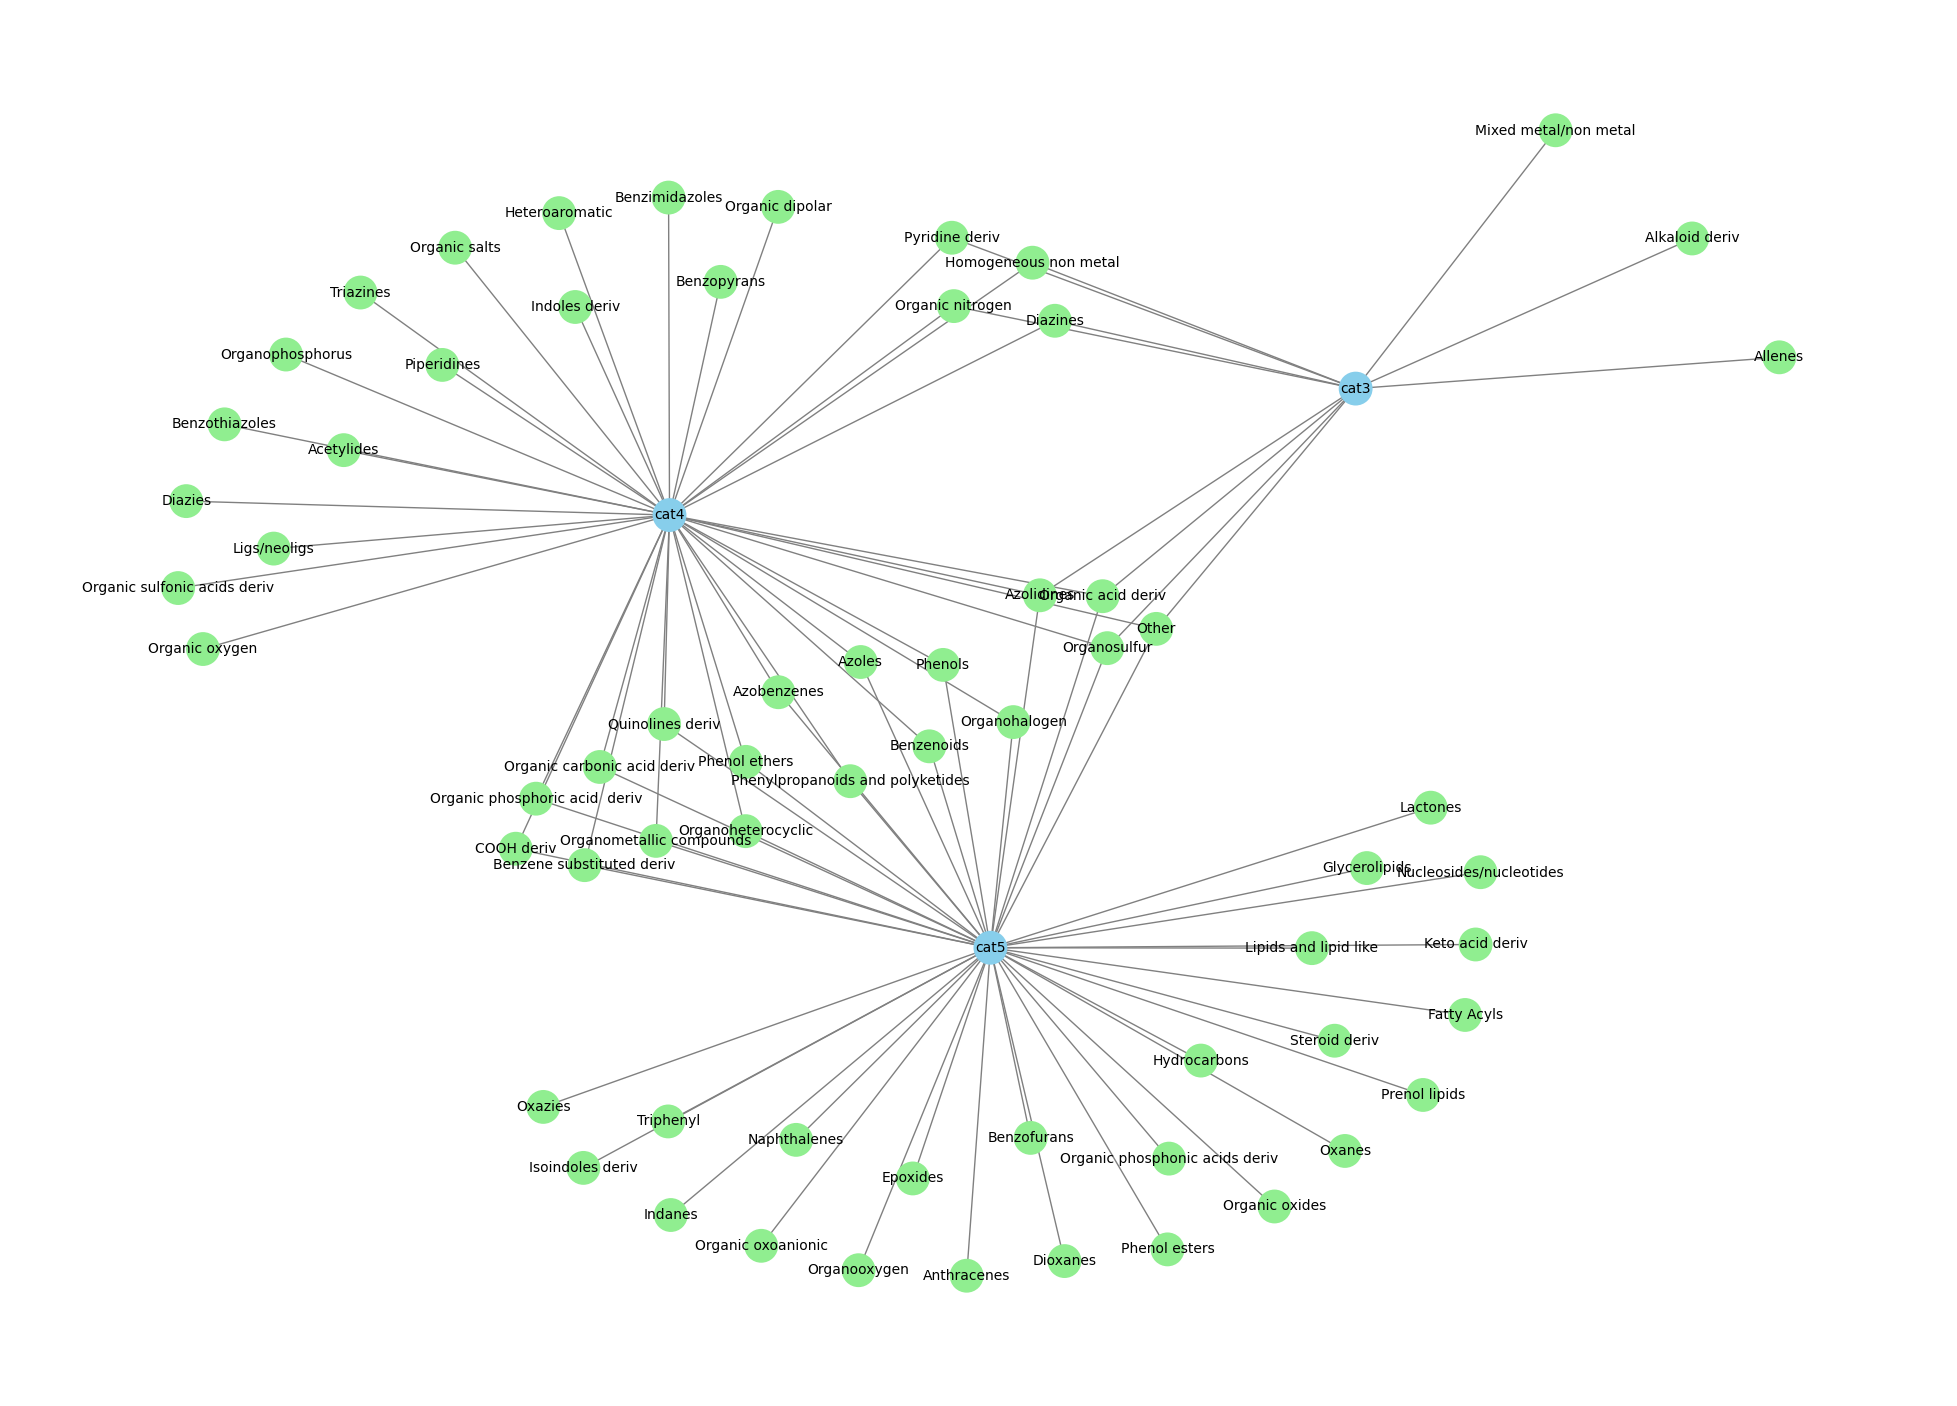

In [633]:
# Create a graph
G = nx.from_pandas_edgelist(df3, 'Category2', 'Assay')
assays = df3['Assay'].unique()
terminal_categories = df3['Category2'].unique()
pos = nx.shell_layout(G)
pos2 = nx.kamada_kawai_layout(G)
# Create a new figure and axis
fig, ax = plt.subplots(figsize = (25,18))

# Position nodes using Fruchterman-Reingold force-directed algorithm
#pos = nx.spring_layout(G)
node_color = ['skyblue' if node in assays else 'lightgreen' for node in G.nodes]

# Draw the graph
nx.draw(G, pos2, with_labels=True, node_size=500, node_color=node_color, font_size=10,  edge_color='gray', linewidths=2, arrowsize=20, ax=ax)

# Show the plot
plt.show()
fig.savefig(figures_dir+'catmos_nx.png', dpi = 300);

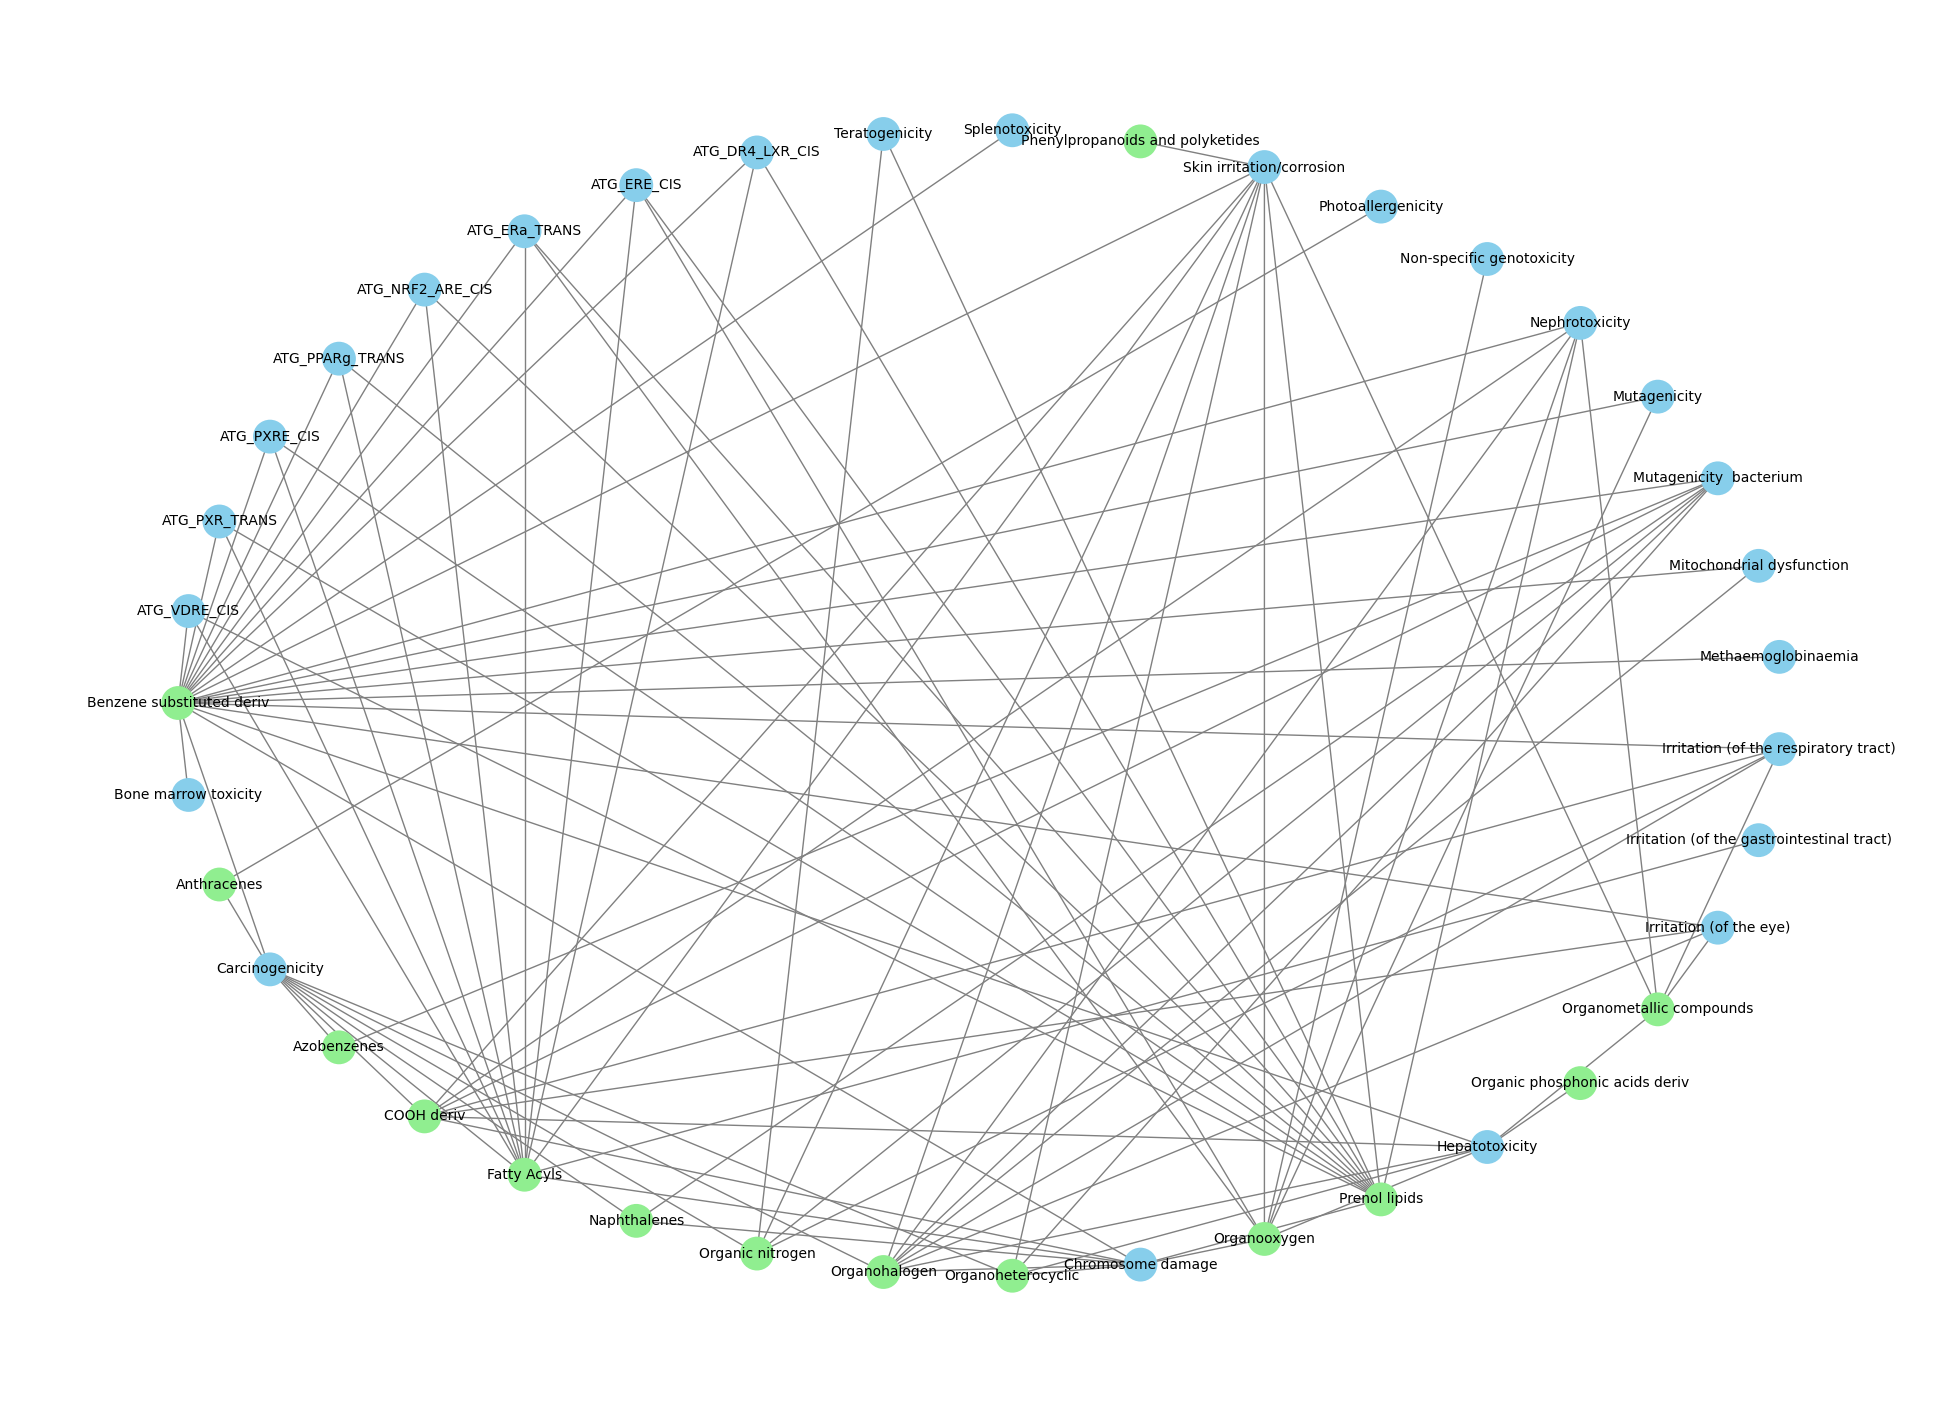

In [632]:
# Create a graph
G = nx.from_pandas_edgelist(df4, 'Category2', 'Assay')
assays = df4['Assay'].unique()
terminal_categories = df4['Category2'].unique()
pos = nx.shell_layout(G)
pos2 = nx.kamada_kawai_layout(G)
# Create a new figure and axis
fig, ax = plt.subplots(figsize = (25,18))

# Position nodes using Fruchterman-Reingold force-directed algorithm
#pos = nx.spring_layout(G)
node_color = ['skyblue' if node in assays else 'lightgreen' for node in G.nodes]

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_color, font_size=10,  edge_color='gray', linewidths=2, arrowsize=20, ax=ax)

# Show the plot
plt.show()
fig.savefig(figures_dir+'derek_txcst_nx.png', dpi = 300);

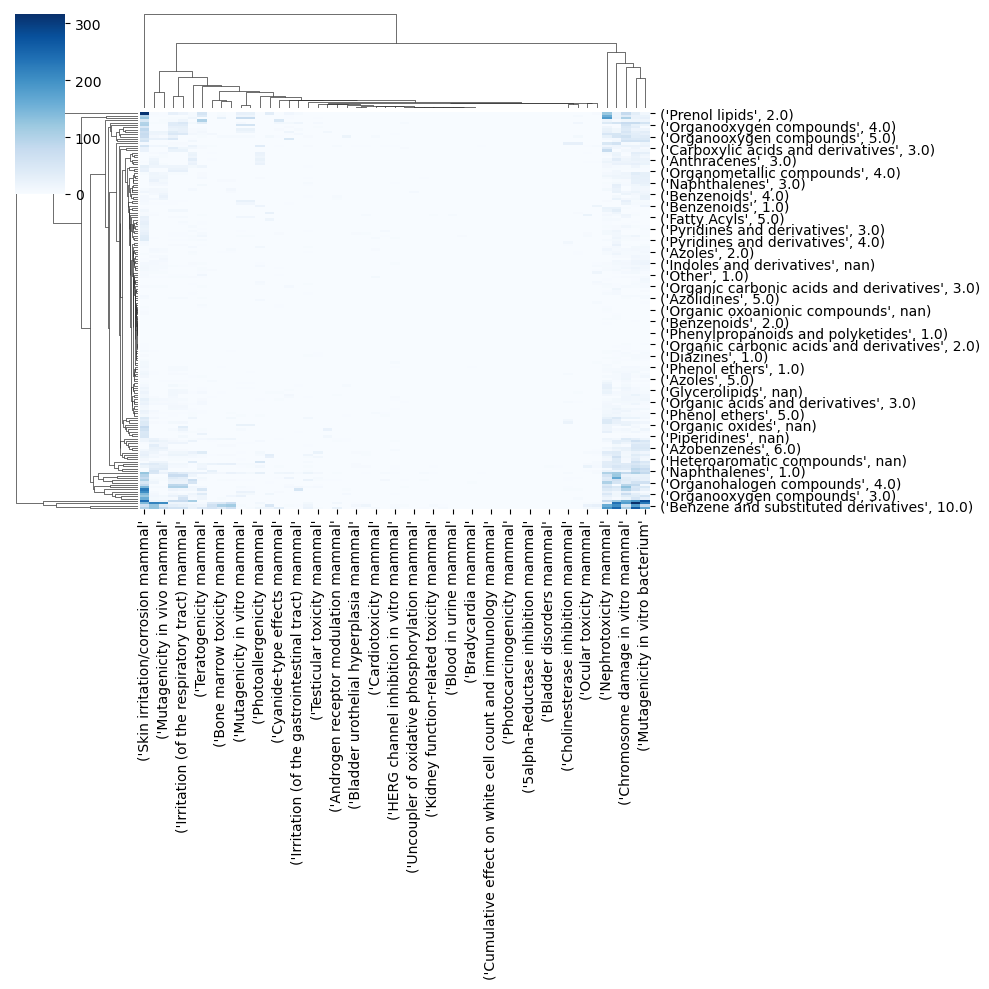

In [300]:
sns.clustermap(new_df.astype(float), cmap = 'Blues')